In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [157]:
X = pd.read_csv('/content/drive/MyDrive/DS560/Data/Clean_data/fake_data1.csv')
X = X[1296:1440]
X['Price'] = np.log10(X['Price'])
X

,Price,Date,County,Ozone,PM2.5,Conductance,PH,oil_count,Gas_Well_Number,positive_tests,fire
1296,5.694605,2010-01,Santa Cruz,0.024767,6.980645,2340.842813,8.055819,7,1.71246,0,0
1297,5.698970,2010-02,Santa Cruz,0.031520,6.239286,2340.842813,8.055819,6,1.71246,0,0
1298,5.720159,2010-03,Santa Cruz,0.038741,5.583333,2340.842813,8.055819,7,1.71246,0,1
1299,5.746362,2010-04,Santa Cruz,0.040667,7.550000,2340.842813,8.055819,7,1.71246,0,1
1300,5.720159,2010-05,Santa Cruz,0.039269,7.525926,2340.842813,8.055819,6,1.71246,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1435,6.098644,2021-08,Santa Cruz,0.030290,6.327419,2340.842813,8.055819,7,1.71246,2216,2
1436,6.075547,2021-09,Santa Cruz,0.035233,7.087931,2340.842813,8.055819,7,1.71246,1281,0
1437,6.055378,2021-10,Santa Cruz,0.036774,3.000000,2340.842813,8.055819,5,1.71246,908,1
1438,6.100371,2021-11,Santa Cruz,0.029233,6.962069,2340.842813,8.055819,7,1.71246,1302,0


In [158]:
X['Year'] = X.Date.str[0:4]
X['Month'] = X.Date.str[5:7]
# X

y, X = X.loc[:,'Price'].values, X.loc[:,['Month', 'Year']].values
# data_dmatrix = xgb.DMatrix(X,label=y)

In [159]:
df_x = {'Month':['01', '02', '03', '04', '05', '06', '07', '08'],
        'Year':['2022', '2022','2022','2022','2022','2022','2022','2022']}
 
# Create DataFrame
df_x = pd.DataFrame(df_x)
 
# Print the output.

future_X = df_x
df_x

,Month,Year
0,01,2022
1,02,2022
2,03,2022
3,04,2022
4,05,2022
5,06,2022
6,07,2022
7,08,2022


In [25]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X_train, y_train, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [160]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plot
import xgboost as xgb
from xgboost import XGBRegressor
import seaborn as sns
plot.style.use('seaborn-bright')

tscv = TimeSeriesSplit(n_splits=13, test_size=9)
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

for train_index, test_index in tscv.split(X):
  # print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  X_train = pipeline.fit_transform(X_train)
  X_test = pipeline.transform(X_test)
  futureX = pipeline.fit_transform(futureX)

  reg_mod = xgb.XGBRegressor(
      n_estimators=1000,
      learning_rate=0.08,
      subsample=0.75,
      colsample_bytree=1, 
      max_depth=7,
      gamma=0,
  )
  reg_mod.fit(X_train, y_train)
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.08, max_delta_step=0, max_depth=7,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
              tree_method='exact', validate_parameters=1, verbosity=None)

  reg_mod.fit(X_train,y_train)

  test_pred = reg_mod.predict(X_test)
  train_pred = reg_mod.predict(X_train)
  futureY = reg_mod.predict(futureX)

  # print('Test set evaluation:\n_____________________________________')
  # print_evaluate(y_test, test_pred)
  # print('Train set evaluation:\n_____________________________________')
  # print_evaluate(y_train, train_pred)

  # results_df = pd.DataFrame(data=[["XGBoost", *evaluate(y_test, test_pred) , cross_val(XGBRegressor())]], 
  #                         columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
  # print(results_df)
  # plot.scatter([i for i in range(len(X_train))], y_train, color = 'red')
  # plot.plot([i for i in range(len(X_train))], train_pred, color = 'blue')
  # plot.title('XGBoost Training Data')
  # plot.xlabel('Months from 2017 to 2021')
  # plot.ylabel('House Price')
  # plot.show()

[23:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [162]:
futureY

array([5.821729 , 5.871486 , 5.8778744, 5.8581853, 5.8742175, 5.8752065,
       5.87212  , 5.8477883], dtype=float32)

In [161]:
df_y = pd.DataFrame(10**futureY, columns= ['Predictions'])

frames = [df_x, df_y]

each_county = pd.concat(frames, axis=1)
each_county['County'] = 'Santa Cruz'

each_county

,Month,Year,Predictions,County
0,01,2022,663329.3125,Santa Cruz
1,02,2022,743851.3750,Santa Cruz
2,03,2022,754873.8125,Santa Cruz
3,04,2022,721415.1875,Santa Cruz
4,05,2022,748544.3125,Santa Cruz
5,06,2022,750250.8125,Santa Cruz
6,07,2022,744937.6250,Santa Cruz
7,08,2022,704349.6875,Santa Cruz


In [163]:
# LA = result.iloc[:,0:4]
# LA
result = pd.concat([result, each_county])
result

,Month,Year,Predictions,County
0,01,2022,443186.40625,Los Angeles
1,02,2022,418736.31250,Los Angeles
2,03,2022,427490.15625,Los Angeles
3,04,2022,472084.59375,Los Angeles
4,05,2022,489152.25000,Los Angeles
...,...,...,...,...
3,04,2022,721415.18750,Santa Cruz
4,05,2022,748544.31250,Santa Cruz
5,06,2022,750250.81250,Santa Cruz
6,07,2022,744937.62500,Santa Cruz


In [175]:
# raw = result
# raw = raw.reset_index()
# raw = raw.drop(columns=["level_0","index"])
raw.to_csv("Prediction.csv")

In [184]:
def sendData(selected):
  pred = pd.read_csv("Prediction.csv")
  final = pred[pred["County"]==selected]
  final = final.drop(columns=['Unnamed: 0'])
  return final

In [185]:
sendData("Orange")

,Month,Year,Predictions,County
8,1,2022,673385.50,Orange
9,2,2022,694703.10,Orange
10,3,2022,705673.40,Orange
11,4,2022,718833.70,Orange
12,5,2022,717855.70,Orange
13,6,2022,705572.60,Orange
14,7,2022,702052.75,Orange
15,8,2022,700471.25,Orange


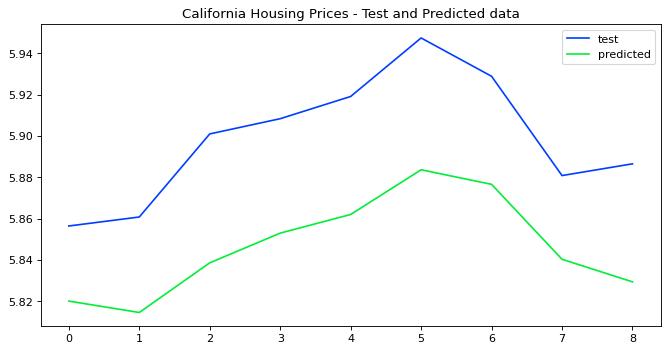

In [ ]:
plt.figure(figsize=(10, 5), dpi=80)
x_ax = range(len(y_test))
# print(test_pred)
plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, test_pred, label="predicted")
plt.title("California Housing Prices - Test and Predicted data")
plt.legend()
plt.show()

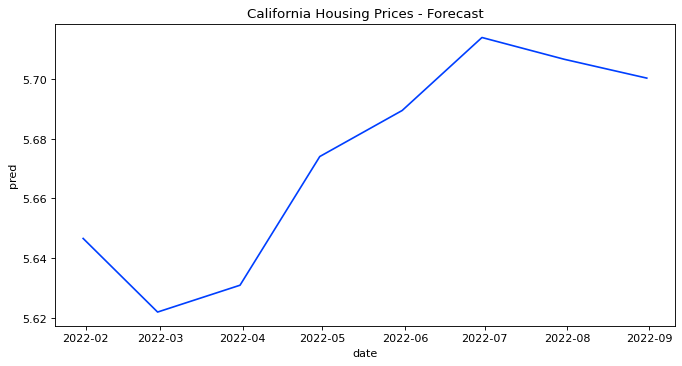

In [ ]:
plt.figure(figsize=(10, 5), dpi=80)
df=pd.DataFrame(futureY, columns=['pred']) 
df['date'] = pd.date_range(start='2022-01', periods=len(df), freq='M')
# df
sns.lineplot(x='date', y='pred', data=df)
plt.title("California Housing Prices - Forecast")
plt.show()

In [ ]:
X_train=pd.DataFrame(X_train)
X_train.columns = ['Ozone','PM2.5','Conductance','PH','oil_count','Gas_Well_Number','positive_tests','fire']
#X_train=X_train[X_train['enc_county']==0]
X_train = X_train.drop(['Gas_Well_Number'],axis=1)
# X_train = X_train[71:131]
#X_train = X_train.drop(['Gas_Well_Number','Conductance'],axis=1)
len(X_train)


132

In [ ]:
y_train = pd.read_csv('/content/drive/MyDrive/DS560/Data/Clean_data/y_train1.csv',index_col=0)
y_train = y_train[0:132]
y_train.shape

(132, 1)

In [ ]:
X_test=pd.DataFrame(X_test)
X_test.columns = ['Ozone','PM2.5','Conductance','PH','oil_count','Gas_Well_Number','positive_tests','fire']
#X_test = X_test[X_test['enc_county']==0]
X_test = X_test.drop(['Gas_Well_Number'],axis=1)
#X_test = X_test.drop(['Gas_Well_Number','Conductance'],axis=1)
X_test

,Ozone,PM2.5,Conductance,PH,oil_count,positive_tests,fire
0,-1.238832,0.090487,1.181738,-0.540710,-1.222936,8.336522,-1.111033
1,-0.495539,-0.469773,1.181738,-0.540710,-1.222936,1.542789,-1.698441
2,0.039727,-1.423266,-0.781019,-0.348450,-1.222936,0.377920,-1.698441
3,0.662316,-0.221778,-0.791703,0.494848,-1.222936,0.200180,-1.698441
4,0.658118,-0.253541,-0.782800,0.652966,-0.956114,0.019709,-1.502638
5,0.752862,-0.835916,-0.757158,0.758379,-1.222936,0.032750,-1.698441
6,0.911179,0.077728,-0.751638,1.759795,-0.956114,1.321995,-1.698441
7,1.153077,0.159931,-0.743091,1.285440,-1.222936,2.368887,-1.894244
8,0.955977,0.222924,-0.796155,-0.506569,-1.222936,1.126649,-1.894244
9,0.080256,-0.274094,-0.739707,-0.559275,-1.222936,0.700548,-2.090047


In [ ]:
# X_test=X_test[0:12]
X_test

,Ozone,PM2.5,Conductance,PH,oil_count,positive_tests,fire
0,-1.238832,0.090487,1.181738,-0.540710,-1.222936,8.336522,-1.111033
1,-0.495539,-0.469773,1.181738,-0.540710,-1.222936,1.542789,-1.698441
2,0.039727,-1.423266,-0.781019,-0.348450,-1.222936,0.377920,-1.698441
3,0.662316,-0.221778,-0.791703,0.494848,-1.222936,0.200180,-1.698441
4,0.658118,-0.253541,-0.782800,0.652966,-0.956114,0.019709,-1.502638
5,0.752862,-0.835916,-0.757158,0.758379,-1.222936,0.032750,-1.698441
6,0.911179,0.077728,-0.751638,1.759795,-0.956114,1.321995,-1.698441
7,1.153077,0.159931,-0.743091,1.285440,-1.222936,2.368887,-1.894244
8,0.955977,0.222924,-0.796155,-0.506569,-1.222936,1.126649,-1.894244
9,0.080256,-0.274094,-0.739707,-0.559275,-1.222936,0.700548,-2.090047


In [ ]:
y_test = pd.read_csv('/content/drive/MyDrive/DS560/Data/Clean_data/y_test1.csv',index_col=0)
y_test = y_test[0:12]
y_test.shape

(12, 1)

In [ ]:
frames = [X_train, X_test.iloc[0:6]]
X_train = pd.concat(frames)

In [ ]:
X_test = X_test[6:]
X_test

,Ozone,PM2.5,Conductance,PH,oil_count,positive_tests,fire
6,1.160754,0.673630,-1.267442,2.256892,-1.553951,4.156766,-0.464187
7,1.383490,0.727460,-1.258586,1.784977,-1.553951,7.143381,-0.464187
8,1.202004,0.768709,-1.313566,0.002190,-1.553951,3.599475,-0.464187
9,0.395652,0.443243,-1.255080,-0.050245,-1.553951,2.383879,-0.464187
10,-0.403176,1.969721,-1.315780,-0.627030,-1.553951,2.529075,-0.464187
11,-0.997469,1.555140,-1.423748,0.107060,-1.553951,18.507246,-0.464187


In [ ]:
frames = [y_train, y_test.iloc[0:6]]
y_train = pd.concat(frames)
y_train

,Price
71,5.701352
72,5.682100
73,5.647784
74,5.645127
75,5.660087
...,...
133,5.822247
134,5.824919
135,5.856391
136,5.860745


In [ ]:
y_test = y_test[6::]
y_test

,Price
138,5.908351
139,5.919115
140,5.947458
141,5.928892
142,5.880814
143,5.886491


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import hvplot.pandas
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X_train1 = X_train.reset_index(drop=True)
y_train1 = y_train.reset_index(drop=True)




# X2 = sm.add_constant(X_train)
#len(X_train)
#len(y_train)
est = sm.OLS(y_train1, X_train1)
est2 = est.fit()
print(est2.summary())
#model = sm.OLS(y_train, X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.056
Method:                 Least Squares   F-statistic:                           0.005173
Date:                Wed, 06 Apr 2022   Prob (F-statistic):                        1.00
Time:                        18:30:33   Log-Likelihood:                         -415.85
No. Observations:                 132   AIC:                                      845.7
Df Residuals:                     125   BIC:                                      865.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
# print the intercept
print(lin_reg.intercept_)

[5.64831757]


In [ ]:
coeff_df = pd.DataFrame(lin_reg.coef_.T, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Ozone,0.011663
PM2.5,0.010155
Conductance,0.029387
PH,0.006644
oil_count,-0.036257
positive_tests,0.013954
fire,-0.048111


Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Area Income is associated with an increase of $21.52.

Holding all other features fixed, a 1 unit increase in Avg. Area House Age is associated with an increase of $164883.28.

Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms is associated with an increase of $122368.67.

Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms is associated with an increase of $2233.80.

Holding all other features fixed, a 1 unit increase in Area Population is associated with an increase of $15.15.

In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 0.0985174241033937
MSE: 0.011757750857240292
RMSE: 0.10843316308786852
R2 Square -6.691727965775582
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05354088819511274
MSE: 0.004417126245866381
RMSE: 0.06646146436745418
R2 Square 0.676663939746188
__________________________________


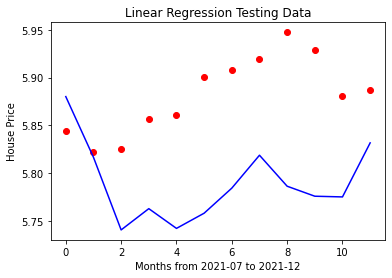

In [ ]:
import matplotlib.pyplot as plot
plot.scatter([i for i in range(len(X_test))], y_test, color = 'red')
plot.plot([i for i in range(len(X_test))], test_pred, color = 'blue')
plot.title('Linear Regression Testing Data')
plot.xlabel('Months from 2021-07 to 2021-12')
plot.ylabel('House Price')
plot.show()

In [ ]:
test_pred = pd.DataFrame(test_pred)
test_pred = test_pred.reset_index()
y_test = y_test.reset_index()

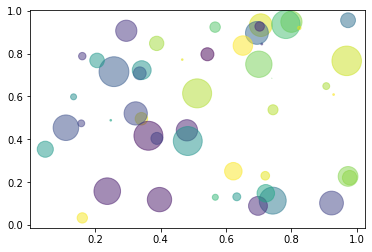

In [ ]:


# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [ ]:
# pd.DataFrame({'True Values': y_test, 'Predicted Values': test_pred}).hvplot.scatter(x='True Values', y='Predicted Values')

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test['Price'], test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test['Price'], test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.13400989055026083
MSE: 0.020620594817381127
RMSE: 0.143598728467146
R2 Square -12.489655271110665
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05853413139778526
MSE: 0.005184452065838551
RMSE: 0.0720031392776631
R2 Square 0.620495269495251
__________________________________


In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test['Price'], test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test['Price'], test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.23335281163037327
MSE: 0.05598215751105819
RMSE: 0.23660548918200988
R2 Square -35.62261020330274
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.09938846260089958
MSE: 0.013661099978762125
RMSE: 0.11688070832589151
R2 Square 0.0
__________________________________


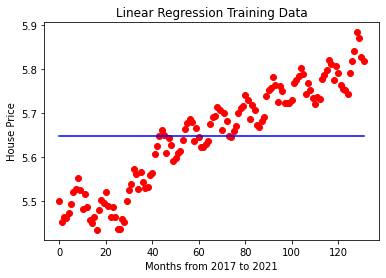

In [ ]:
import matplotlib.pyplot as plot
plot.scatter([i for i in range(len(X_train))], y_train, color = 'red')
plot.plot([i for i in range(len(X_train))], train_pred, color = 'blue')
plot.title('Linear Regression Training Data')
plot.xlabel('Months from 2017 to 2021')
plot.ylabel('House Price')
plot.show()

ValueError: ignored

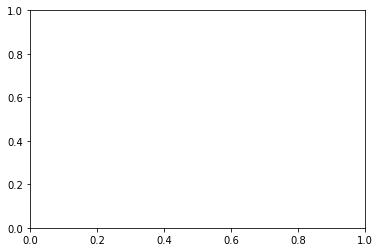

In [ ]:
import matplotlib.pyplot as plot
plot.scatter([i for i in range(len(X_test))], y_test, color = 'red')
plot.plot([i for i in range(len(X_test))], test_pred, color = 'blue')
plot.title('Linear Regression Testing Data')
plot.xlabel('Months from 2021-07 to 2021-12')
plot.ylabel('House Price')
plot.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test['Price'], test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test['Price'], test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 5.357871973233057
MSE: 217.00896299253915
RMSE: 14.731224083304793
R2 Square -141962.7080033732
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03640113702269651
MSE: 0.00214492516331619
RMSE: 0.0463133367758812
R2 Square 0.8429903033686348
__________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
